# Homework 3: Custom Functions
### Due Monday, April 20th, at 11:59 pm
Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

You should start early so that you have time to get help if you're stuck.

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

In [1]:
# Don't change this cell; just run it
import numpy as np
import babypandas as bpd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('hw.ok')
_ = ok.auth(inline=True)

ModuleNotFoundError: No module named 'client'

**Important**: The `ok` tests don't always tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach).

## 1. Avocadopocalypse

In early 2017, reduced harvests and labor strikes caused avocado production in Mexico, Peru, and California to  dramatically decrease. In this problem we will investigate how and where prices fluctuated in response to the "avocadopocalypse".

The source of the avocado price data is [here](http://www.hassavocadoboard.com/retail/volume-and-price-data). We will use a subset of the data. The data has the following columns:

|Column|Description|
|------|-----------|
|Date|The date on which a price was recorded in YEAR-MONTH format|
|Type|The type of avocado. Either "conventional" or "organic".|
|Region|Where the price was recorded.|
|Price|The average avocado price for that time period/location.|
|Volume|The number of avocados sold (in thousands).|

**Question 1.1.** The data are in a CSV called `avocado.csv`. Read this file into a table named `avocado`. There is not good columns to use as the index, so don't set one!

In [2]:
#...avocado
avocado = bpd.read_csv('avocado.csv')
avocado

,Date,Region,Type,Price,Volume
0,2015-01,Boise,conventional,1.0750,66.582385
1,2016-06,Sacramento,conventional,1.1925,498.762617
2,2016-10,Indianapolis,organic,1.7080,3.403160
3,2017-03,Indianapolis,organic,1.1975,6.276205
4,2017-09,StLouis,organic,2.6750,4.368665
...,...,...,...,...,...
4129,2015-09,BaltimoreWashington,organic,1.5575,11.213677
4130,2015-03,GrandRapids,conventional,1.0800,199.245174
4131,2015-09,SouthCentral,organic,1.5125,65.335568
4132,2018-01,Charlotte,conventional,1.3050,268.444935


In [3]:
_ = ok.grade('q1_1')

NameError: name 'ok' is not defined

It might look like the `Date` column would make a good index, but it turns out that its entries are not unique! We can see this using the `.describe()` method, which gives us some useful information about a column:

In [4]:
avocado.get('Date').describe()

count        4134
unique         39
top       2016-09
freq          106
Name: Date, dtype: object

We see that although there are 4134 entries, only 39 of them are unique. This is because the same date will appear once for each city in the data set.

**Question 1.2.** Assign `second_cheapest` to the name of the region which had the second cheapest avocados (in), and similarly assign `fifth_expensive` to the name of the region with the fifth most expensive avocados (of any type, and any date).


In [5]:
#...second_cheapest
second_cheapest = avocado.sort_values('Price').get('Region').iloc[1]
second_cheapest

'PhoenixTucson'

In [6]:
#...fifth_expensive
fifth_expensive = avocado.sort_values('Price').get('Region').iloc[-5]
fifth_expensive 

'Portland'

In [7]:
_ = ok.grade('q1_2')

NameError: name 'ok' is not defined

**Question 1.3.** Avocados are sold in two types: organic and conventional. Make a table named `organic` containing only the data for organic avocados, and a table named `conventional` for conventional avocados.

In [8]:
#...organic
organic = avocado[avocado.get('Type') == 'organic']

In [9]:
#...conventional
conventional = avocado[avocado.get('Type') == 'conventional']

In [10]:
_ = ok.grade('q1_3')

NameError: name 'ok' is not defined

**Question 1.4.**: Create a table named `Portland_max` which contains one column, `Volume`. The Volume column should be equal to the max volume of avocados (either organic or conventional) sold in Portland for each date. The index of your table should contain the dates.


*Hint*: if you do this right, you won't need to use `.set_index()` to make the date the row label.

In [11]:
#...Portland_max
Portland_max=avocado[avocado.get('Region')=='Portland'].groupby('Date').max().drop(columns=['Price', 'Type','Region'])
Portland_max


,Volume
Date,
2015-01,495.626550
2015-02,520.715278
2015-03,447.882634
2015-04,512.133530
2015-05,602.611250
...,...
2017-11,490.306495
2017-12,531.155938
2018-01,602.547905


In [12]:
_ = ok.grade('q1_4')

NameError: name 'ok' is not defined

**Question 1.5.** Create a table named `avg_prive` containing one column named `AvgPrice` containing the average price of conventional avocados sold on each date. Your table should have one row for each date, and the row label should be the date.


In [13]:
#...avg_price
avg_price = bpd.DataFrame().assign(
    AvgPrice=conventional.groupby('Date').mean().get('Price')
)
avg_price.get('AvgPrice').sum()


45.18596226415095

In [14]:
_ = ok.grade('q1_5')

NameError: name 'ok' is not defined

**Question 1.6.** Plot the average price of conventional avocados in the entire US as a function of date. Does the data support the "avocadopocalypse"; that is, were prices higher in 2017? Describe how you could use the given data to investigate the *reason* that prices were higher.

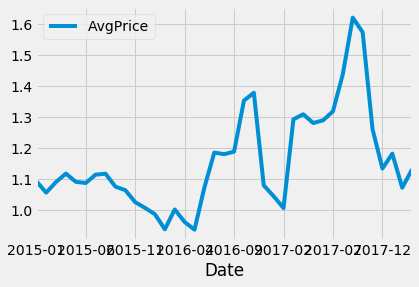

In [15]:
# Make your plot here
avg_price.plot(kind='line', y='AvgPrice')

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

*Write your answer here.*

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

## 2. Power Outages


The dataset below contains information about power outages that occurred in North America between 2000 to 2014. The data is a subset of the data available [here](https://www.kaggle.com/autunno/15-years-of-power-outages).  Run the next cell to load the data.

In [16]:
# just run this cell
power = bpd.read_csv("powerdata.csv")
power

,Event Description,Year,Time Event Began,Date of Restoration,Time of Restoration,Respondent,Geographic Areas,NERC Region,Number of Customers Affected,Tags
0,Severe Weather - Thunderstorms,2014,8:00 PM,7/2/2014,6:30 PM,Exelon Corporation/ComEd,Illinois,RFC,"420,000","severe weather, thunderstorm"
1,Severe Weather - Thunderstorms,2014,11:20 PM,7/1/2014,5:00 PM,Northern Indiana Public Service Company,North Central Indiana,RFC,"127,000","severe weather, thunderstorm"
2,Severe Weather - Thunderstorms,2014,5:55 PM,7/1/2014,2:53 AM,We Energies,Southeast Wisconsin,MRO,"120,000","severe weather, thunderstorm"
3,Fuel Supply Emergency - Coal,2014,1:21 PM,Unknown,Unknown,We Energies,Wisconsin,MRO,Unknown,"fuel supply emergency, coal"
4,Physical Attack - Vandalism,2014,2:54 PM,6/24/2014,2:55 PM,Tennessee Valley Authority,"Nashville, Tennessee",SERC,Unknown,"vandalism, physical"
...,...,...,...,...,...,...,...,...,...,...
1647,Transmission Line Loss,2000,4:00 p.m.,3/18/2000,5:10:00 PM,El Paso Elec. Co.,Texas,MAIN,"100,000",transmission interruption
1648,Vandalism,2000,9:06 p.m.,NaN,NaN,Alliant Energy,Maine,MAIN,NaN,vandalism
1649,Ice Storm,2000,10:00 p.m.,2/3/2000,12:00:00 PM,Duke Power Co.,South Carolina,SERC,"81,000","severe weather, winter storm"
1650,Ice Storm,2000,7:00 p.m.,NaN,NaN,Carolina Power & Light,North Carolina & Northern South Carolina,SERC,"173,000","severe weather, winter storm"


**Question 2.1.** Find the proportion of all power outages that occured in the year 2010. Save your answer to the variable `outage_2010`.

In [17]:
#...outage_2010
outage_2010 = power[power.get('Year') == 2010].shape[0] / power.shape[0]
outage_2010

0.07445520581113801

In [18]:
_ = ok.grade('q2_1')

NameError: name 'ok' is not defined

**Question 2.2.** Make a bar chart showing the number of outages per NERC Region. Make sure that the bars are sorted from longest to shortest. You can learn more about what a NERC region is [here](https://www.nerc.com/Pages/default.aspx).

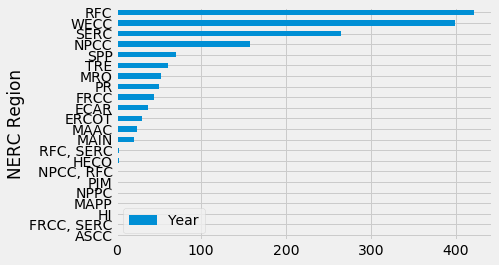

In [19]:
#- put your code here
#can choose to get any column that has no null vals
power.groupby('NERC Region').count().sort_values('Year').plot(kind='barh', y='Year')

**Question 2.3.** Draw a line plot of the count of power outages by year.

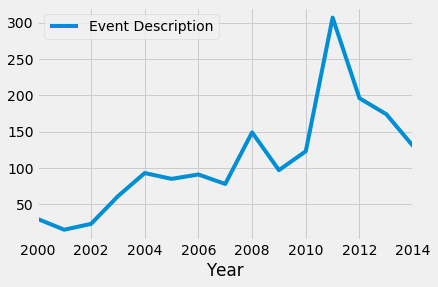

In [20]:
#- put your code here:
# can choose any column that has no null vals as y column here
power.groupby('Year').count().plot(y='Event Description')

**Question 2.4.** We notice that there is a spike in power outages in the year 2011. Let's explore some of the data of the outages in the year 2011. Create a table named `power_2011` which has one column, `Count`, which is a count of the number of times that `Event Description` occured in 2011. The index should contain the event descriptions.

In [21]:
#...power_2011
power_count = power[power.get('Year') == 2011].groupby('Event Description').count()
power_2011 = bpd.DataFrame().assign(Count=power_count.get('Year'))
power_2011

,Count
Event Description,
Actual Physical Attack,1
Cold Weather Event,1
Distribution System Interruption,1
Earthquake,1
Electrical Fault at Generator,1
...,...
Transmission Level Interruption,1
Transmission Level Outage,1
Transmission/Distribution Interruption; Load Shed; Generation Inadequacy,1


In [22]:
_ = ok.grade('q2_4')

NameError: name 'ok' is not defined

**Question 2.5.** How many outages were there in New York in 2011?

*Hint*: There are many geographic areas in New York For instance, "Manhattan, New York" is one, "Central New York" is another.

In [23]:
#...ny_outages
ny_outages = power[(power.get('Geographic Areas').str.contains('New York')) & (power.get('Year') == 2011)].shape[0]
ny_outages

21

In [ ]:
_ = ok.grade('q2_5')

## 3. Defining Functions

**Question 3.1.** Define a function named `square_and_cube` that takes in x and returns an array containing two items: x squared and x cubed. For all the function questions in this assignment, feel free to add additional lines if needed.

In [7]:
def square_and_cube(x):
    ...

In [8]:
#DELETE
def square_and_cube(x):
    return np.array([x**2, x**3])

In [ ]:
_ = ok.grade('q3_1')

**Question 3.2.** Define a function named `distance` that takes in four parameters x1, y1, x2, y2 and returns the Euclidean distance (the "ordinary" straight-line distance) between point (x1, y1) and point (x2, y2).

In [ ]:
def distance(x1, y1, x2, y2):
    ...

In [ ]:
#DELETE
def distance(x1, y1, x2, y2):
    return ((y2 - y1) ** 2 + (x2 - x1) ** 2) ** 0.5

In [ ]:
_ = ok.grade('q3_2')

**Question 3.3.** Define a function named `array_distance` that takes in two arrays array([x1, y1]) and array([x2, y2]) and returns the Euclidean distance between point (x1, y1) and point (x2, y2). Feel free to use the `distance` function you defined.

In [ ]:
def array_distance(array1, array2):
    ...

In [ ]:
#DELETE
def array_distance(array1, array2):
    x1 = array1[0]
    y1 = array1[1]
    x2 = array2[0]
    y2 = array2[1]
    return distance(x1, y1, x2, y2)

In [ ]:
_ = ok.grade('q3_3')

**Question 3.4.** Define a function named `closer_to_origin` that takes in two arrays array([x1, y1]) and array([x2, y2]), compares which point in (x1, y1) and (x2, y2) is closer to the origin, and returns that point's distance from the origin. Feel free to use the previous functions you defined.

In [ ]:
def closer_to_origin(array1, array2):
    ...

In [ ]:
#DELETE
def closer_to_origin(array1, array2):
    dist1 = array_distance(array1, np.array([0,0]))
    dist2 = array_distance(array2, np.array([0,0]))
    return min(dist1, dist2)

In [ ]:
_ = ok.grade('q3_4')

## 4. Olympic Medals

In this question, we will analyze data on Olympic athletes who won medals in the Winter Olympic Games from 1896-2014. You can find the data [here](https://www.kaggle.com/the-guardian/olympic-games#dictionary.csv)

The data is in a CSV file called `winter.csv`. Read this file into a table named `winter`. There is no good index, we will leave it unset.

In [10]:
winter_data = bpd.read_csv('winter.csv')
winter_data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


The `Country` column contains International Olympic Committee (IOC) [country codes](https://olympics.fandom.com/wiki/List_of_IOC_country_codes). We want to convert these country codes into actual country names that everyone can understand.

We'll use a Python [dictionary](https://www.tutorialspoint.com/python/python_dictionary.htm) to help us with this conversion. A dictionary is a simple way to map a unique key to a value. For example, the below dictionary maps course codes to course names.

In [ ]:
dsc_courses = {
    'DSC 10': 'Principles of Data Science',
    'DSC 20': 'Programming and Basic Data Structures for Data Science',
    'DSC 30': 'Data Structures and Algorithms for Data Science',
    'DSC 40A': 'Theoretical Foundations of Data Science I',
    'DSC 40B': 'Theoretical Foundations of Data Science II',
    'DSC 80': 'The Practice and Application of Data Science'
}

We can access the value corresponding to each key using bracket notation.

In [ ]:
dsc10_name = dsc_courses['DSC 10']
dsc10_name

Here, `DSC 10` is the key and `Principles of Data Science` is the value.

Let's use a dictionary to help us with our country code to country name conversion. Below is a dictionary containing country codes as keys and country names as values for each of the countries in our dataset of Winter Olympic medal winners.

In [11]:
country_codes = {
 'USA': 'United States',
 'CAN': 'Canada',
 'NOR': 'Norway',
 'URS': 'Soviet Union',
 'FIN': 'Finland',
 'SWE': 'Sweden',
 'GER': 'Germany',
 'SUI': 'Switzerland',
 'AUT': 'Austria',
 'RUS': 'Russia',
 'ITA': 'Italy',
 'GDR': 'East Germany',
 'TCH': 'Czechoslovakia',
 'FRA': 'France',
 'NED': 'Netherlands',
 'FRG': 'West Germany',
 'KOR': 'Korea, South',
 'CHN': 'China',
 'GBR': 'United Kingdom',
 'CZE': 'Czech Republic',
 'JPN': 'Japan',
 'EUN': 'Unified Team',
 'POL': 'Poland',
 'EUA': 'United Team of Germany',
 'SLO': 'Slovenia',
 'AUS': 'Australia',
 'BLR': 'Belarus',
 'LAT': 'Latvia',
 'BEL': 'Belgium',
 'HUN': 'Hungary',
 'UKR': 'Ukraine',
 'CRO': 'Croatia',
 'LIE': 'Liechtenstein',
 'YUG': 'Yugoslavia',
 'EST': 'Estonia',
 'KAZ': 'Kazakhstan',
 'BUL': 'Bulgaria',
 'DEN': 'Denmark',
 'SVK': 'Slovakia',
 'ROU': 'Romania',
 'ESP': 'Spain',
 'PRK': 'Korea, North',
 'LUX': 'Luxembourg',
 'NZL': 'New Zealand',
 'UZB': 'Uzbekistan'}

**Question 4.1.** Using `country_codes`, define a function named `code_to_country` that takes as input a country code and returns the corresponding country name. (Should be only one line)

In [ ]:
def code_to_country(code):
    ...

In [12]:
#DELETE
def code_to_country(code):
    return country_codes[code]

In [ ]:
_ = ok.grade('q4_1')

**Question 4.2.** Using your `code_to_country` function, use `.get(col).apply()` to convert all of the country codes into country names in the `Country` column. Do this without creating an additional column. Store your result in `winter`.

*Hint*: Is there a way to use the `.assign` method to *replace* values in these two columns without creating additional columns?

In [13]:
#...winter
winter = winter_data.assign(Country=winter_data.get('Country').apply(code_to_country))
winter

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",France,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",France,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",France,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",France,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",Switzerland,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",United Kingdom,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",United States,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",Canada,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",Czech Republic,Women,Snowboard Cross,Gold


In [ ]:
_ = ok.grade('q4_2')

**Question 4.3.** 
Define a function named `lastname_length` that returns the length of a lastname. It should take as an input the name of the athlete. Notice that the name consists of the 'lastname, firstname' of the athlete.

*Hint:* Use the string function [`.split()`](https://docs.python.org/3/library/stdtypes.html#str.split). This is useful in splitting the name into a lastname and a firstname.

In [ ]:
def lastname_length(name):
    ...

In [14]:
#DELETE
def lastname_length(name):
    last_name = name.split(', ')[0]
    return len(last_name)

In [ ]:
# Test cases for your own reference.
print(lastname_length('Skywalker, Leia'))  # Should print 9
print(lastname_length('Antetokounmpo, Thanasis')) # Should print 13
print(lastname_length('Ozymandias, Steve'))  #Should print 10

In [ ]:
_ = ok.grade('q4_3')

**Question 4.4.** Create a function named `mean_values` that takes as an input the name of a country and returns the mean last name length of the athletes from that country. 

*Hint:* use the previously defined function!

In [ ]:
def mean_values(country):
    ...

In [17]:
#DELETE
def mean_values(country):
    country_of_interest = winter[winter.get('Country') == country]
    name_lengths = country_of_interest.get('Athlete').apply(lastname_length)
    return name_lengths.mean()
int(mean_values('China'))

3

In [ ]:
_ = ok.grade('q4_4')

**Question 4.5.** 
Create a table called `last_names` with original columns `Year`, `Sport`, `Athlete` and `Country` and new column `Last_Name_Length` that has the length of the last name, with the longest name at the top and shortest at bottom.

*Hint*: Remember that you can create intermediate variables. This is a good time to do so!

In [ ]:
#...last_names
winter_cut = winter_data.get(["Year", "Sport", "Athlete", "Country"])
last_names = winter_cut.assign(Last_Name_Length = winter_data.get('Athlete').apply(lastname_length))
last_names = last_names.sort_values('Last_Name_Length', ascending = False)
last_names

In [ ]:
_ = ok.grade('q4_5')

**Question 4.6.** What is the length of the longest name? Assign this number to `longest_name_length`. What is the length of the shortest name? Assign this number to `shortest_name_length`.

In [ ]:
#...longest_name_length
longest_name_length = last_names.get('Last_Name_Length').iloc[0]
longest_name_length

In [ ]:
#...shortest_name_length
shortest_name_length = last_names.get('Last_Name_Length').iloc[-1]
shortest_name_length

In [ ]:
_ = ok.grade('q4_6')

**Question 4.7.** Make a function called `point_total` that takes in a country name (string) and awards points based on olympic medals. The country gets 1 point for every bronze medal, 2 points for every silver and 3 for every gold.

In [ ]:
def point_total(country):
    ...

In [ ]:
#DELETE
def point_total(country):
    gold = winter[(winter.get("Country")==country) & (winter.get('Medal') == 'Gold')].shape[0] * 3
    silver = winter[(winter.get("Country")==country) & (winter.get('Medal') == "Silver")].shape[0] * 2
    bronze = winter[(winter.get("Country")==country) & (winter.get('Medal') ==  "Bronze")].shape[0]
    return gold + silver + bronze

In [ ]:
_ = ok.grade('q4_7')

**Question 4.8.** Among the five countries listed below, which has the highest point count overall?:

1. United Kingdom 
2. Sweden 
3. Japan
4. Czech Republic
5. Australia

Save the name of the country as `country` and the number of points as `points`. You can set the value of `country` and `points` by hand.

In [ ]:
#helps you compare
point_total("United Kingdom"), point_total("Sweden"), point_total("Japan"), point_total("Czech Republic"), point_total("Australia")

In [ ]:
#...country
country = 'Sweden'

In [ ]:
#...points
points = 816

In [ ]:
_ = ok.grade('q4_8')

**Question 4.9.** Create a bar chart of the median last name length by country. Use your chart to answer the question: which country has the longest median last name? You can write your answer by hand by assigning it to `country_longest_name`.

In [ ]:
last_names.groupby('Country').median().sort_values('Last_Name_Length').plot(kind='barh', y='Last_Name_Length', figsize=(5,20))

In [ ]:
#...country_longest_name
country_longest_name = 'Spain'

In [ ]:
_ = ok.grade('q4_9')

## 5. Histograms

Suppose we have a table called `data` with two numerical columns, "x" and "y". Consider the following scatter plot, which was generated by calling `data.plot(kind='scatter', x='x', y='y')`:

![](scatter.png)

Now consider these two histograms:

**Histogram A**:

![](hist_one.png)

**Histogram B**:

![](hist_two.png)

**Question 5.1.** Which of these two lines of code generated Histogram B?
 1. `data.plot(kind='hist', y='x')`
 2. `data.plot(kind='hist', y='y')`  
 
 Which line generated Histogram B? Assign either `1` or `2` to `which_histogram`.

In [ ]:
#...which_histogram
which_histogram = 2

**Question 5.2.** Suppose we run this line of code:

    new_data = bpd.DataFrame().assign(
        x = data.get('x') + 5,
        y = data.get('y')
    )
    
 We then run `new_data.plot(kind = 'hist', y='x')`. What does the new histogram look like?

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

*Write your answer here.*

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

In [ ]:
#DELETE
# The generated histogram looks the same as Histogram A above, except that values on x-axis 
# are all five units greater.

**Question 5.3.** According to the histograms above, approximately what percent of points in the scatterplot have an `x` value between -1 and 0 (inclusive)? Return the number (from 1 to 4) of the correct percentage listed below in the variable `x_between`.

1. 25
2. 30
3. 45
4. 60

In [2]:
#...x_between
x_between = 2
x_between

2

In [ ]:
_ = ok.grade('q5_3')

# Finish Line

Congratulations, you're done with the homework!  Be sure to

- **Verify that all tests pass** (the next cell has a shortcut for that), 
- **Save and Checkpoint** from the `File` menu,
- **Run the last cell to submit your work**

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir('tests') if q.startswith('q')]

In [ ]:
_ = ok.submit()

## Don't forget to submit your PDF to Gradescope!

Select File > Download As > PDF via LaTeX in the File menu. Turn in this PDF file into the respective assignement at https://gradescope.com/.
<br>
If you submit more than once before the deadline, we will only grade your final submission